# **Project Name**    -   **Coronavirus Tweet Sentiment Analysis**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -** **Mohd Suhel**


# **Project Summary -**

In this Classification project, we aim to predict correct sentiment of a tweet from the data.

We begin by extracting the target and feature variable from the data and removing other features.

We combine Extremely Positive/ Negative sentiments with Positive/Negative Sentiments to reduce the number of Classes from 5 to 3

Then we perform an EDA on the processed dataset, where we use bar charts, pie charts and word clouds to visualise the information

In Text Pre-processing, we convert the text to lower case, remove punctuations,stop words, apply stemming and lemmatize the words


Finally we compare the models' performance using two approaches of With and Without Cross-Validation and Hyperparameter technique. Both of these vectorisation methods do not work on analysing the part of speech, but work on giving importance to a word based on the number of occurences of a word in single and also in all documents all together.

We apply the following models:

**Logistic Regression**

**Stochastic Gradient Descent (SGD)**

**Naive Bayes Classifier,** 

**and We also used Cross validation to improve results of our models**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Sentiment(Negative,Positive and Neutral) of Tweets which posted during Covid 19**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
!pip install contractions
import contractions
!pip install unidecode
import unidecode


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 20.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 8.6 MB/s eta 0:00:00


In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from datetime import *

import warnings
warnings.filterwarnings('ignore')

from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from nltk.tokenize import WhitespaceTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Coronavirus Tweets.csv',encoding='latin-1')


### Dataset First View

In [ ]:
# Dataset First Look
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(41157, 6)

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset[dataset.duplicated()].count()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [ ]:
# Visualizing the missing values
#sns.heatmap(dataset.isnull(),cbar=True,annot=True,cmap=['Blue','red'])

### What did you know about your dataset?

Data set have 41157 rows.

Our dataset have 6 columns.

Location Column have 8590 Nan values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns.tolist()

['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet', 'Sentiment']

In [ ]:
# Dataset Describe
dataset.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.to_list():
  print('Unique value of column',i,'is',dataset[i].nunique())

Unique value of column UserName is 41157
Unique value of column ScreenName is 41157
Unique value of column Location is 12220
Unique value of column TweetAt is 30
Unique value of column OriginalTweet is 41157
Unique value of column Sentiment is 5


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#dataset copy to another variable
data=dataset.copy()

In [ ]:
data.rename(columns={'TweetAt':'Tweet_Date',},inplace=True) # Renamae column name

In [ ]:
data['Sentiment'].unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [ ]:
data['Tweet_Date'] = pd.to_datetime(data['Tweet_Date']) # Channge to Datetime object

data['Tweet_Month']=pd.DatetimeIndex(data['Tweet_Date']).month   #Extract Month 

In [ ]:
data.groupby(['Tweet_Month'])["OriginalTweet"].count().reset_index().sort_values(['OriginalTweet'],ascending=False)

,Tweet_Month,OriginalTweet
2,3,26309
3,4,2479
7,8,1881
6,7,1843
5,6,1742
8,9,1471
4,5,1131
9,10,1005
1,2,954
10,11,909


In [ ]:
data['Location'].isnull().sum()

8590

In [ ]:
data.groupby(['Location'])["OriginalTweet"].count().reset_index().sort_values(['OriginalTweet'],ascending=False).head(10)

,Location,OriginalTweet
5690,London,540
10455,United States,528
5765,"London, England",520
7091,"New York, NY",395
10793,"Washington, DC",373
10433,United Kingdom,337
5872,"Los Angeles, CA",281
4729,India,268
10282,UK,232
1149,Australia,225


In [ ]:
pd.DataFrame(data['Sentiment'].value_counts()).reset_index().rename(columns={'index':'Sentiment','Sentiment':'Count'}).sort_values(['Count'],ascending=False)

,Sentiment,Count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


In [ ]:
# Write your code to make your dataset analysis ready.
pure_negative_data = data[(data['Sentiment']=='Negative' ) | (data['Sentiment']=='Extremely Negative')].reset_index()
pure_negative_data['Location'].value_counts()

London                          208
London, England                 195
United States                   171
Washington, DC                  135
United Kingdom                  133
                               ... 
MIAMI / LA                        1
Ferguson at Heart                 1
South-West London                 1
HMP Belmarsh                      1
i love you so much || he/him      1
Name: Location, Length: 5612, dtype: int64

In [ ]:
data

### What all manipulations have you done and insights you found?

In EDA part i found **There are 26309 Tweeets in March Month and April month have 2nd highest Tweets which are 2479**

**There is 540 tweet posted in London and 528 in United States ,and**

Tweets consist of 

```
Positive - 11422
Negative - 9917
Neutral - 7713
Extremely Positive - 6624
Extremely Negative - 5481



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Sentiment(Univariate)

Rectangle(xy=(-0.4, 0), width=0.8, height=7713, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=11422, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=5481, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=9917, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=6624, angle=0)


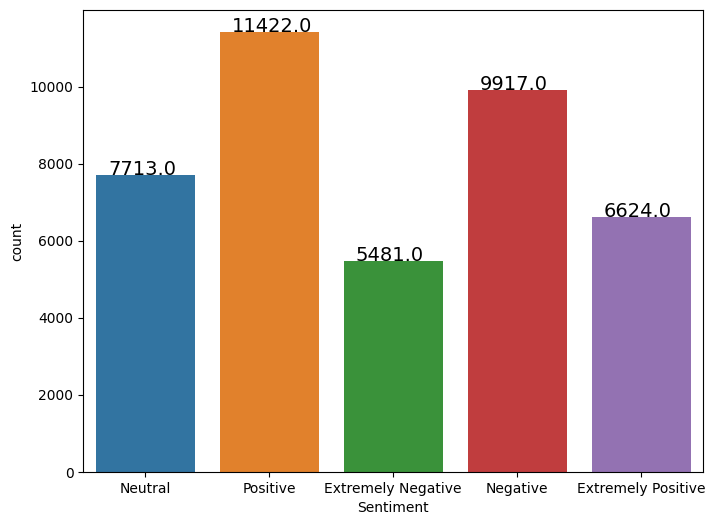

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Sentiment',data = dataset)
ax
for p in ax.patches:
  print(p)
  x = p.get_x() + p.get_width() / 2 - 0.3
  y = p.get_y() + p.get_height() 
  ax.annotate(p.get_height(),(x,y) ,size = 14)

<Axes: ylabel='Sentiment'>

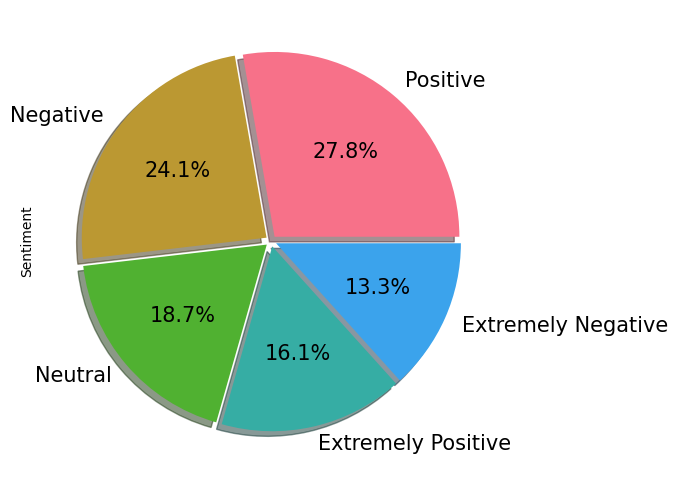

In [ ]:
plt.figure(figsize=(8,6))

dataset['Sentiment'].value_counts().plot(kind='pie',
                                         fontsize=15,
                                         autopct="%0.1f%%",
                                         labels=dataset['Sentiment'].value_counts().index,
                                         explode=[0.03,0.03,0.03,0.03,0.03],
                                         colors = sns.color_palette("husl"),
                                         shadow=True
                                         )



##### 1. Why did you pick the specific chart?

Bar and pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable

##### 2. What is/are the insight(s) found from the chart?

From the above charts i got that **Positive - 11422(27.1%), Extremely Positive - 6624(14.1% ), Negative - 9917(24.1%), Extremely Negative - 5481(13.3%) and Neutral 7713(18.7%)**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

we could say YES because it define our data  has positive ,negative and neutral Tweets.

#### Chart - 2 - Total Tweets Montly(Bivariate) 

In [ ]:
data.groupby(['Tweet_Month'])['OriginalTweet'].count().sort_values(ascending = False).head(10)

Tweet_Month
3     26309
4      2479
8      1881
7      1843
6      1742
9      1471
5      1131
10     1005
2       954
11      909
Name: OriginalTweet, dtype: int64

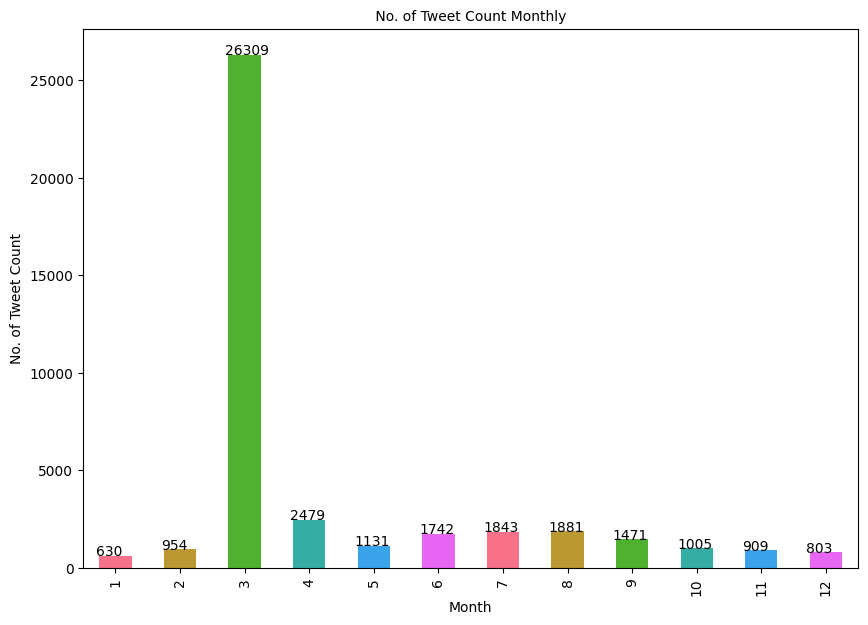

In [ ]:
# Chart - 2 visualization code
no_tweet_month=data.groupby(['Tweet_Month'])["OriginalTweet"].count()
#sns.countplot(no_tweet_month)

plt.rcParams['figure.figsize'] = (10, 7)

ax=no_tweet_month.plot(kind='bar',color = sns.color_palette("husl"))
ax
plt.title(" No. of Tweet Count Monthly ", fontsize = 10)
plt.xlabel('Month', fontsize = 10)
plt.ylabel('No. of Tweet Count', fontsize = 10)

for p in ax.patches:
  x = p.get_x() + p.get_width() / 2 - 0.3
  y = p.get_y() + p.get_height() 
  ax.annotate(p.get_height(),(x,y) ,size = 10)


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a 
categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages,or count.

##### 2. What is/are the insight(s) found from the chart?

Above Charts shows that most tweets posted in March month.

There is 26309 total tweets in this month

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

YES,In this month have most frequent tweets which tells most tweet can be Negative.

#### Chart - 3 - No. of Tweet Sentiment (Bivariate)

Text(0.5, 1.0, ' No. of Tweet with sentiment')

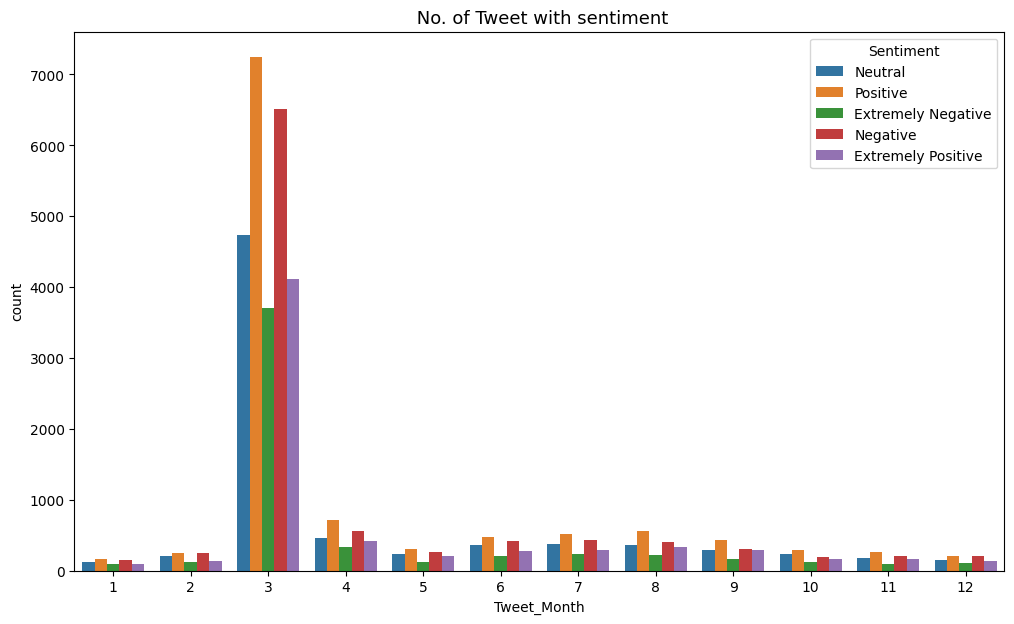

In [ ]:
# Chart - 3 visualization code
plt.rcParams["figure.figsize"]=(12,7)

sns.countplot(x="Tweet_Month", hue="Sentiment", data=data)
plt.title(" No. of Tweet with sentiment", fontsize = 13)


##### 1. Why did you pick the specific chart?

I used countplot because it showing the observational count in different category based bins with the help of bars.

##### 2. What is/are the insight(s) found from the chart?

Above count plot tells that Negative and Positive Tweets are about same frequent There are Negative Tweets above 10000 in march month and below 1500 tweets in other months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is show negative,positive, neutral tweets count.

#### Chart - 4 -  Country with most Tweeted(Bivariate)

In [ ]:
data.groupby(['Location'])["OriginalTweet"].count().sort_values(ascending=False).head(20)

Location
London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
England, United Kingdom    191
Canada                     191
Toronto, Ontario           160
Global                     159
Chicago, IL                155
California, USA            153
San Francisco, CA          152
Boston, MA                 150
New York, USA              140
Name: OriginalTweet, dtype: int64

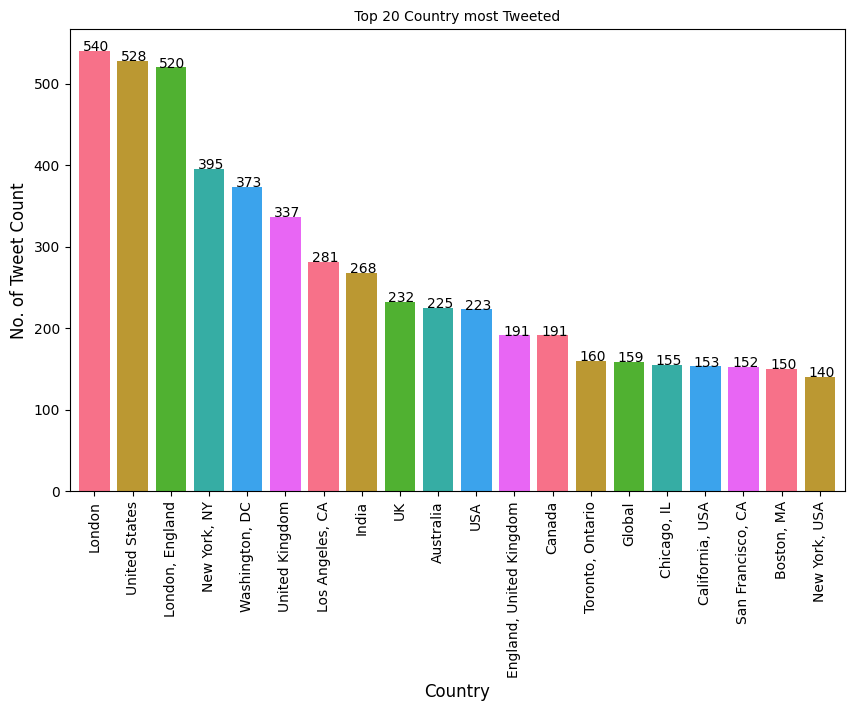

In [ ]:
# Chart - 4 visualization code
loc_tweet=data.groupby(['Location'])["OriginalTweet"].count().sort_values(ascending=False).head(20)
plt.rcParams['figure.figsize'] = (10, 6)

ax=loc_tweet.plot(kind='bar',color = sns.color_palette("husl"),width=0.8)
plt.title(" Top 20 Country most Tweeted ", fontsize = 10)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('No. of Tweet Count', fontsize = 12)

for p in ax.patches:
  x = p.get_x() + p.get_width() / 2 - 0.3
  y = p.get_y() + p.get_height() 
  ax.annotate(p.get_height(),(x,y) ,size = 10)


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a 
categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages,or count.

##### 2. What is/are the insight(s) found from the chart?

We found from above chart that **London** is  most tweeted(540), **United State** is 2 most tweeted(528) and **London,England** is 3rd most tweeted(520) posted Country and many more...

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes ,this graph will help to creating a positive impact.

#### Chart - 5 - Most Country with Negative Tweeted (Bivariate)

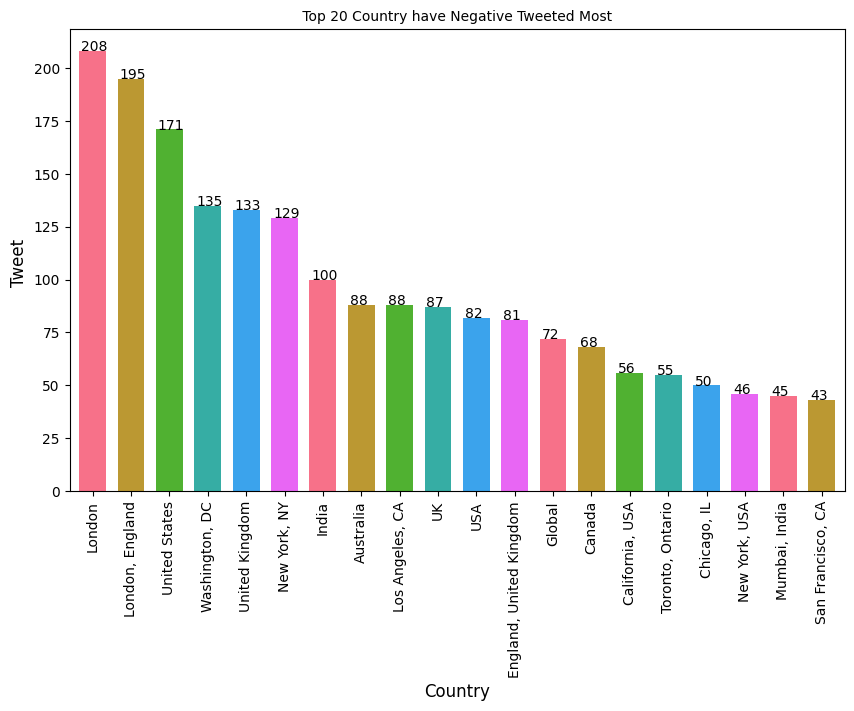

In [ ]:
# Chart - 5 visualization code
neg_data=data[(data['Sentiment']=='Negative') | (data['Sentiment']=='Extremely Negative')]
plt.rcParams['figure.figsize'] = (10, 6)
ax=neg_data['Location'].value_counts().head(20).plot(kind='bar',color = sns.color_palette("husl"),width=0.7)
ax
plt.title(" Top 20 Country have Negative Tweeted Most ", fontsize = 10)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Tweet ', fontsize = 12)

neg_data['Location'].value_counts().head(20)
for p in ax.patches:
  x = p.get_x() + p.get_width() / 2 - 0.3
  y = p.get_y() + p.get_height() 
  ax.annotate(p.get_height(),(x,y) ,size = 10)

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a 
categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages,or count.

##### 2. What is/are the insight(s) found from the chart?

We found from above chart that **London** is  most Negative tweeted(208), **London,England** is 2 most Negative tweeted(195) and **United States** is 3rd most Negative tweeted(171) posted Country and many more...

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is lead to Negative growth because these are most negative tweet posted country.


#### Chart - 6 - Most Country with Positive Tweeted (Bivariate)

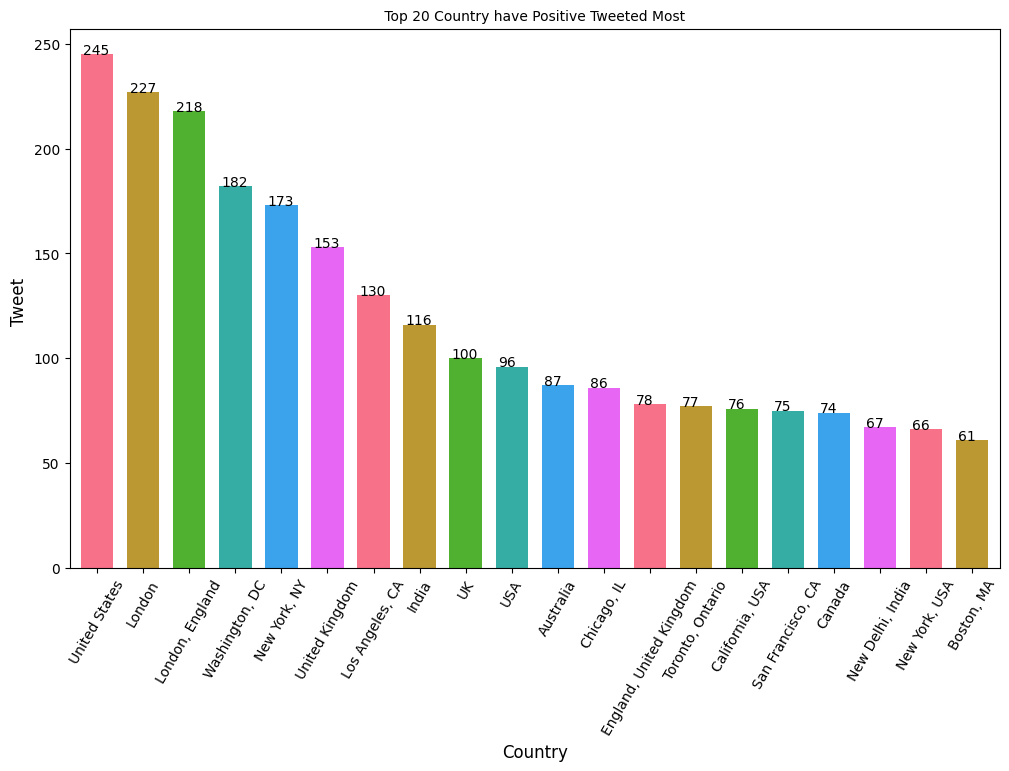

In [ ]:
# Chart - 6 visualization code
pos_data=data[(data['Sentiment']=='Positive') | (data['Sentiment']=='Extremely Positive')]

plt.rcParams["figure.figsize"]=(12,7)

ax=pos_data['Location'].value_counts().head(20).plot(kind='bar',color = sns.color_palette("husl"),width=0.7)
ax
plt.title(" Top 20 Country have Positive Tweeted Most ", fontsize = 10)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Tweet ', fontsize = 12)
plt.xticks(rotation=60)
pos_data['Location'].value_counts().head(20)

for p in ax.patches:
  x = p.get_x() + p.get_width() / 2 - 0.3
  y = p.get_y() + p.get_height() 
  ax.annotate(p.get_height(),(x,y) ,size = 10)

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a 
categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages,or count.

##### 2. What is/are the insight(s) found from the chart?

We found from above chart that **United States** is  most Positive tweeted(245), **London** is 2 most Positive tweeted(227) and **London,England** is 3rd most Positive tweeted(218) posted Country and many more...

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These country have positive and Negative tweets.

So we can say that these have positive and Negative business impact.

#### Chart - 7 - Most Used Hashtags(Univariate)





In [ ]:
# Chart - 7 visualization code
def count_hashtag(t):
  return [i for i in t.split() if '#' in i]


In [ ]:
data['hastag']=data['OriginalTweet'].apply(count_hashtag)


In [ ]:
from collections import Counter
d = Counter(data.hastag.sum())
hashtags= pd.DataFrame([d]).T.reset_index()


In [ ]:
hashtags.rename(columns = {'index':'Hashtags',0:'Count'}, inplace = True)



In [ ]:
top_hashtags=hashtags.sort_values(by='Count',ascending=False).reset_index(drop=True)

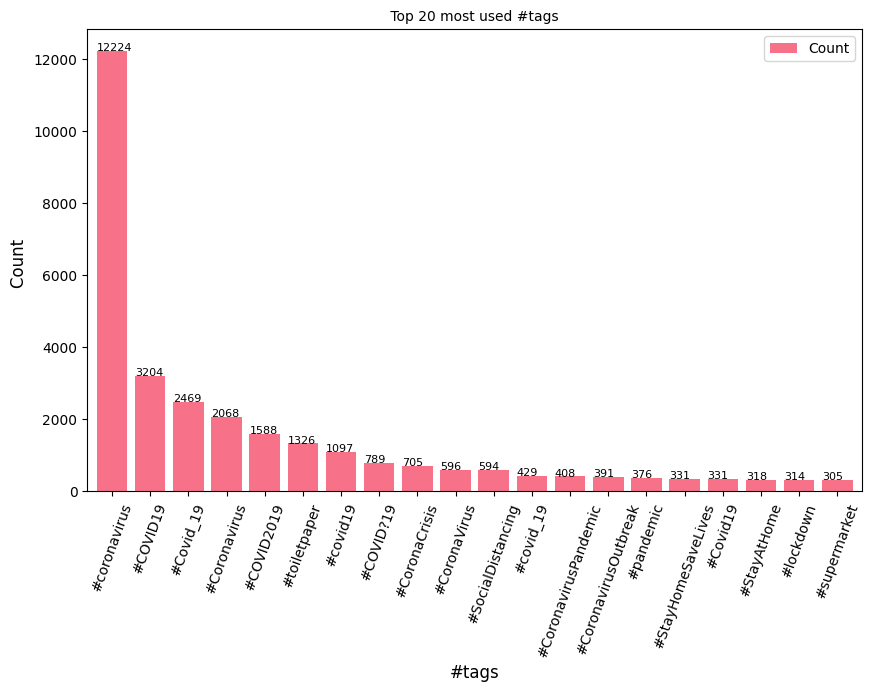

In [ ]:
plt.rcParams["figure.figsize"]=(10,6)

ax=top_hashtags.head(20).plot(kind='bar',
                           x='Hashtags',
                           color = sns.color_palette("husl"),
                           width=0.8
                           )
plt.xticks(rotation=70)
plt.title(" Top 20 most used #tags ", fontsize = 10)
plt.xlabel('#tags', fontsize = 12)
plt.ylabel('Count ', fontsize = 12)

for p in ax.patches:
  x = p.get_x() + p.get_width() / 2 - 0.4
  y = p.get_y() + p.get_height() 
  ax.annotate(p.get_height(),(x,y) ,size = 8)


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a 
categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages,or count.

##### 2. What is/are the insight(s) found from the chart?

above chart shows that most 20 used Hashtags(#) in tweets.

(#coronavirus) used 12224 times,(#COVID19) used 3204 times,(#covid_19) used 2469 times,(#coronavirus) used 12224 times

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No, this is #tag used in tweets. 

#### Chart - 8 - Hashtags with Wordcloud image(Univariate)

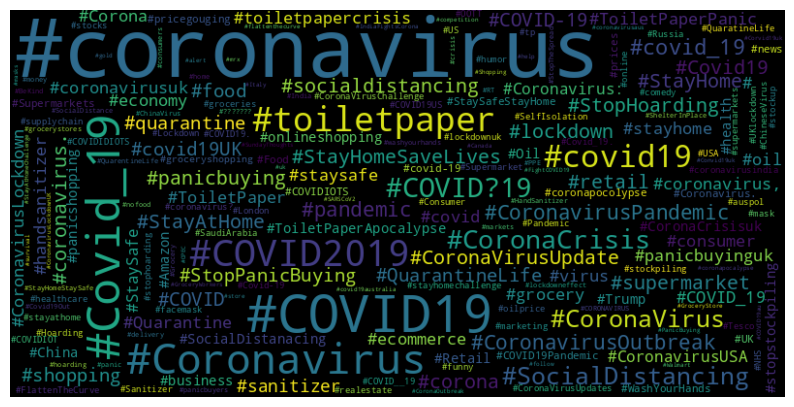

In [ ]:
# Chart - 8 visualization code
wcloud_data = dict(zip(hashtags['Hashtags'].tolist(), hashtags['Count'].tolist()))
wcloud = WordCloud(width=800, height=400, max_words=200,background_color = 'black').generate_from_frequencies(wcloud_data)
plt.figure(figsize=(10, 10))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


##### 1. Why did you pick the specific chart?

This graph shows most used hashtags are showing in Highlight and least used hashtags are showing in low font size.

##### 2. What is/are the insight(s) found from the chart?

Wordcloud image of above Hashtags.





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these #tags tells us that what is going on (trending ,current, drift) in the world.

 These #tags can help creating a positive business impact.

#### Chart - 9 - Most Used user_name(Univariate)

In [ ]:
# Chart - 9 visualization code
def count_username(text):
  return [i for i in text.split() if '@' in i]


In [ ]:
data['user_name']=data['OriginalTweet'].apply(count_username)


In [ ]:
from collections import Counter
cnt= Counter(data.user_name.sum())
usrnam= pd.DataFrame([cnt]).T.reset_index()


In [ ]:
usrnam.rename(columns = {'index':'User_name',0:'Count'}, inplace = True)

In [ ]:
top_username=usrnam.sort_values(by='Count',ascending=False).reset_index(drop=True)

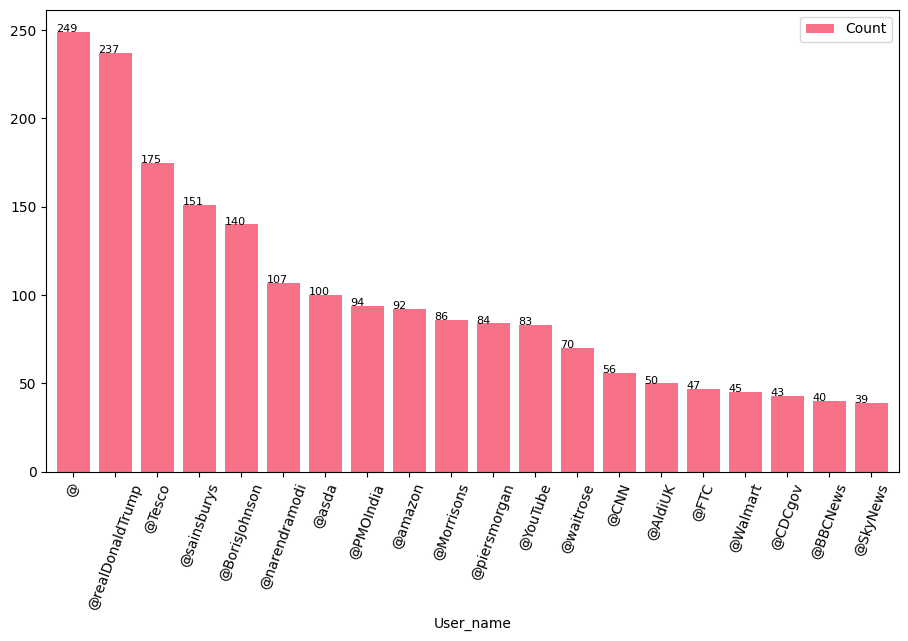

In [ ]:
plt.rcParams["figure.figsize"]=(11,6)

ax=top_username.head(20).plot(kind='bar',
                           x='User_name',
                           color = sns.color_palette("husl"),
                           width=0.8
                           )
plt.xticks(rotation=70)

for p in ax.patches:
  x = p.get_x() + p.get_width() / 2 - 0.4
  y = p.get_y() + p.get_height() 
  ax.annotate(p.get_height(),(x,y) ,size = 8)


##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a 
categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages,or count.

##### 2. What is/are the insight(s) found from the chart?

above chart shows that most 20 active users.

(@realDonaldTrump) used 237 times,(@Tesco) used 175 times,(@sainsburys) used 151 times,(@Borisohnson) used 140 times and (@narendramodi) used 107 times and many more.....

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,There is most used user_name that's mean those person is realy powerful.

#### Chart - 10 - user_name with Wordcloud image(Univariate)

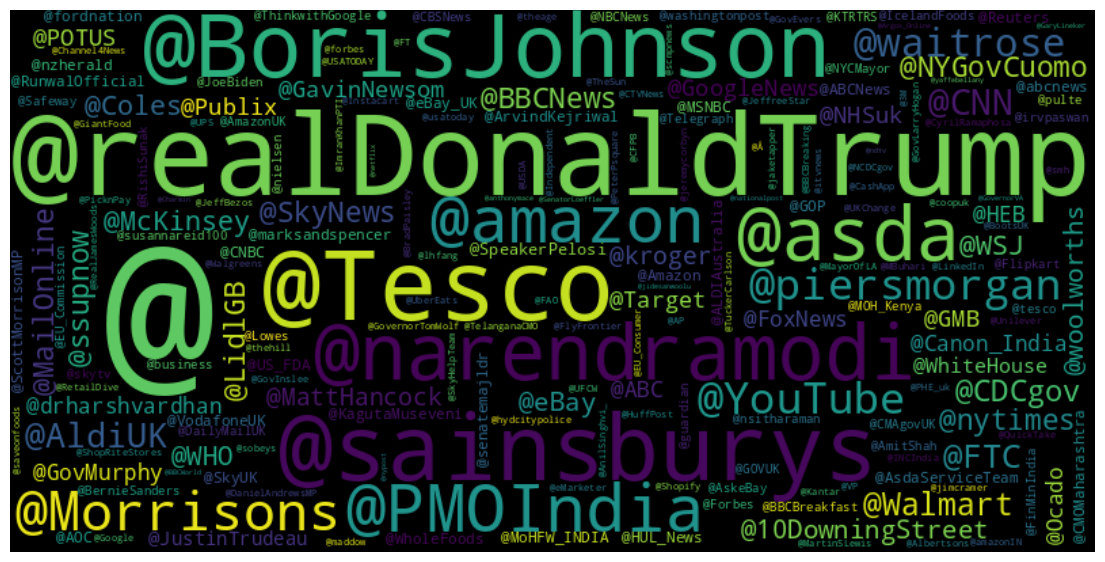

In [ ]:
# Chart - 10 visualization code
wcloud_data_user = dict(zip(usrnam['User_name'].tolist(), usrnam['Count'].tolist()))
wcloud = WordCloud(width=800, height=400, max_words=200,background_color = 'black').generate_from_frequencies(wcloud_data_user)
plt.figure(figsize=(14, 12))
plt.imshow(wcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


##### 1. Why did you pick the specific chart?

This graph shows most used user_name are showing in Highlight and least used hashtags are showing in low font size.

##### 2. What is/are the insight(s) found from the chart?

Wordcloud image of above User_name.





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,There is most used user_name that's mean those person is realy powerful.

#### Chart - 11 - Most frequent word in dataset

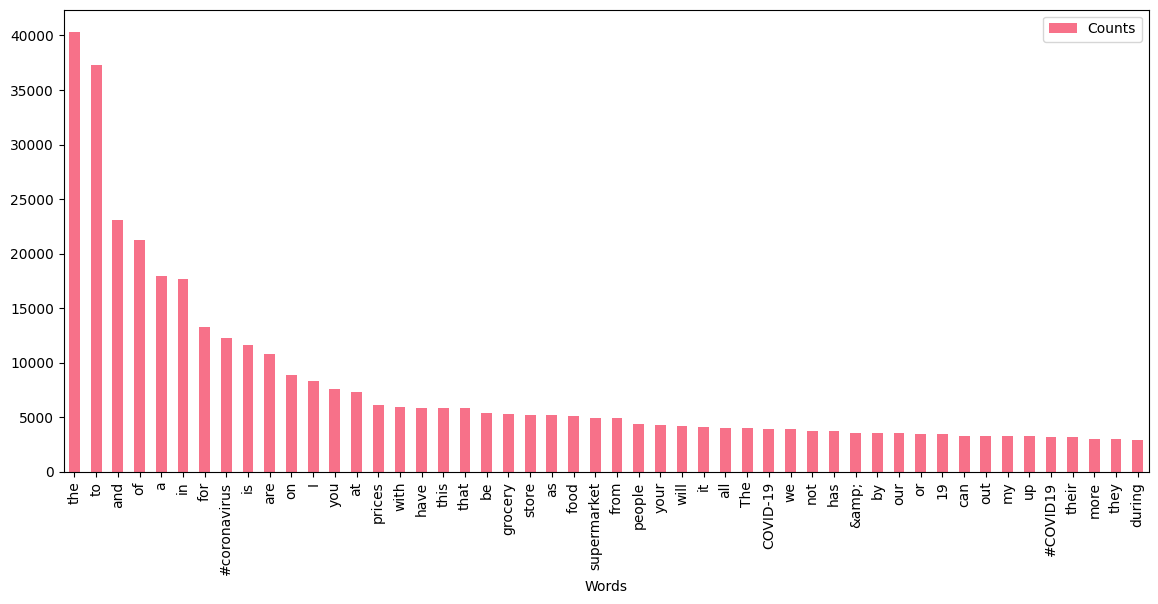

In [ ]:
# Chart - 11 visualization code
count = Counter()
# Count  the every word
for text in dataset['OriginalTweet'].values:
  for word in text.split():
    count[word] += 1
        
text_list = count.most_common(50)
# ploting a bar graph
plt.rcParams["figure.figsize"] = (14,6)
pd.DataFrame(text_list, columns=['Words','Counts']).set_index('Words').plot(kind='bar',color = sns.color_palette("husl"))
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages,or count.



##### 2. What is/are the insight(s) found from the chart?

We found this graph that it show most word used in dataset e.g-



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No, there is no impact on business.

#### Chart - 12 - Correlation Heatmap

<Axes: >

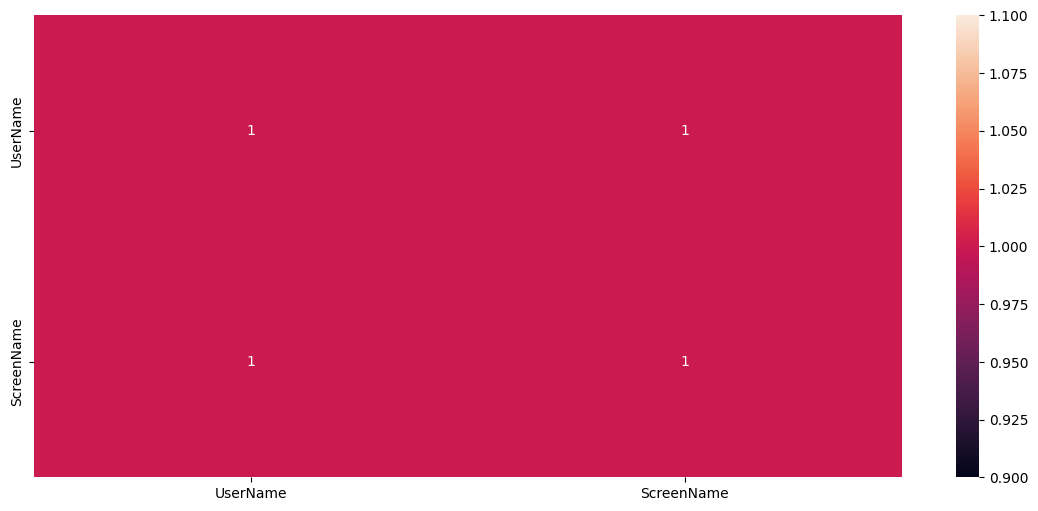

In [ ]:
# Correlation Heatmap visualization code
corr=dataset.corr()
sns.heatmap(corr,annot=True)

##### 1. Why did you pick the specific chart?

We use this graph because it find potential relationships between variables and to understand the strength of these relationships.

#### Chart - 13 - Pair Plot 

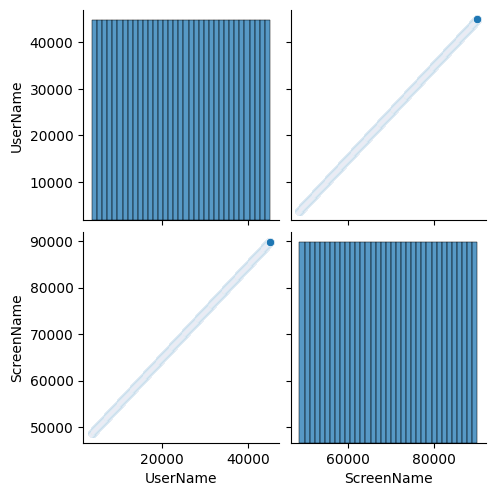

In [ ]:
# Pair Plot visualization code
sns.pairplot(dataset)

##### 1. Why did you pick the specific chart?

We use this plot because it explain a relationship between two variables or to form the most separated clusters

## ***5. Hypothesis Testing***

**Not Needed hypothesis Testing in NLP Sentiment**

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

# nan value fiil by forward fill of value
data['Location'].fillna(method="ffill",limit=1,inplace=True)


In [ ]:
data['Location'].isnull().sum()

2141

In [ ]:
# remain nan value fiil by backward fill of value

data['Location'].fillna(method="bfill",limit=1,inplace=True)
data['Location'].isnull().sum()

556

In [ ]:
data['Location'].mode()


0    London
Name: Location, dtype: object

In [ ]:
# remain nan value fiil by most frequent value

data['Location'].fillna('London',inplace=True)
data['Location'].isnull().sum()

0

#### What all missing value imputation techniques have you used and why did you use those techniques?

We used **ffill, bfill and mode value** of this data because it is catagorical column. 

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# NOT NEEDED

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
#Not Needed

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

####0. Remove username

In [ ]:
def remove_username(text):
  return " ".join([i for i in text.split() if '@' not in i])

In [ ]:
data['Tweet'] = data['OriginalTweet'].apply(remove_username)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction
def expand_contraction(text):
  return " ".join([contractions.fix(i) for i in text.split()])

In [ ]:
data['Tweet'] = data['Tweet'].apply(expand_contraction)


#### 2. Lower Casing

In [ ]:
# Lower Casing
def case_low(text):
  return " ".join([i.lower() for i in text.split()])

In [ ]:
data['Tweet'] = data['Tweet'].apply(case_low)


#### 3. Removing Punctuations

In [ ]:
import string
import nltk
from nltk.corpus import stopwords



In [ ]:
# Remove Punctuations
def remove_punc(data):
  translator = str.maketrans('', '', string.punctuation)
  return data.translate(translator)

In [ ]:
data['Tweet']=data['Tweet'].apply(remove_punc)


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
def remove_url(text):
  return " ".join([i for i in text.split() if 'ht' not in i])

In [ ]:
data['Tweet'] = data['Tweet'].apply(remove_url)


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Remove Stopwords
swords = stopwords.words('english')
swords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def stopwords(text):
  text = [word.lower() for word in text.split() if word.lower() not in swords]
  return " ".join(text)

In [ ]:
data['Tweet'] = data['Tweet'].apply(stopwords)


In [ ]:
# Remove White spaces
def space_rem(text):
    text = [word.strip() for word in text.split()]
    return " ".join(text)

In [ ]:
data['Tweet'] = data['Tweet'].apply(space_rem)


#### 6. Removing Accents from Words

In [ ]:
def remove_accents(text):
  return " ".join([unidecode.unidecode(i) for i in text.split()])
  

In [ ]:
data['Tweet'] = data['Tweet'].apply(remove_accents)


####7. Remove Hashtag

In [ ]:
def remove_hash(text):
  l=[]
  for i in text.split():
    if '#' not in i:
      l.append(i)
    else:
      l.append(i.replace("#", ""))
  return ' '.join(l)   

In [ ]:
data['Tweet'] = data['Tweet'].apply(remove_hash)


#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 8. Tokenization

In [ ]:
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.width', 1000)

In [ ]:
 #Tokenization
  #whitespace tokenizer
tokenize = WhitespaceTokenizer()

# Now applying it on the target column
data['Tweet'] = data['Tweet'].apply(tokenize.tokenize)
data['Tweet'].head(5)


In [ ]:
def tok(text):
  return [i for i in text.split()]

In [ ]:
data['Tweet'] = data['Tweet'].apply(tok)


#### 9. Text Normalization

In [ ]:
# create an object of stemming function

lemmat = WordNetLemmatizer()
  
def lemma_proc(text):    
    text = [lemmat.lemmatize(i) for i in text]
    return text 

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# create an object of stemming function

stemmer = SnowballStemmer("english")

def stem_proc(text):    
    text = [stemmer.stem(i) for i in text]
    return text 

In [ ]:
#data['Tweet'] = data['Tweet'].apply(lemma_proc)

In [ ]:
data['Tweet'] = data['Tweet'].apply(stem_proc)

##### Which text normalization technique have you used and why?

I used Stemming process in normalization because Stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling.

#### 10. Part of speech tagging

In [ ]:
# POS Taging
nltk.download('averaged_perceptron_tagger')
def pos(text):
  text=nltk.pos_tag(text)
  return text

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
#data['text']=data['Tweet'].apply(pos)

In [ ]:
#data[['OriginalTweet','text']].sample(10)

#### 11. Text Vectorization

In [ ]:
def join(text):
  return ' '.join(text)

In [ ]:
data['Tweet']=data['Tweet'].apply(join)

In [ ]:
# Vectorizing Text
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(data['Tweet'])

dic = count_vectorizer.vocabulary_.items()


In [ ]:
vocab = []
count = []
for i,j in dic:
  vocab.append(i)
  count.append(j)

vocabul=pd.Series(count,index=vocab).sort_values(ascending=False)
vocabul

zzz           42093
zwoferink     42092
zweli         42091
zwd           42090
zvikwereti    42089
              ...  
0000hrs           4
000042            3
0000009375        2
000               1
00                0
Length: 42094, dtype: int64

In [ ]:
vocabul.head(30)

zzz               42093
zwoferink         42092
zweli             42091
zwd               42090
zvikwereti        42089
zusendung         42088
zuschla           42087
zusammenhalten    42086
zurfi             42085
zur               42084
zuppardo          42083
zumwalt           42082
zumindest         42081
zumbuehl          42080
zuku              42079
zuckerberg        42078
zu                42077
zp                42076
zouzou            42075
zororo            42074
zoreumlab         42073
zorb              42072
zoopla            42071
zoonot            42070
zoonos            42069
zoomunivers       42068
zoommeet          42067
zoomllshop        42066
zoomer            42065
zoombomb          42064
dtype: int64

<Axes: >

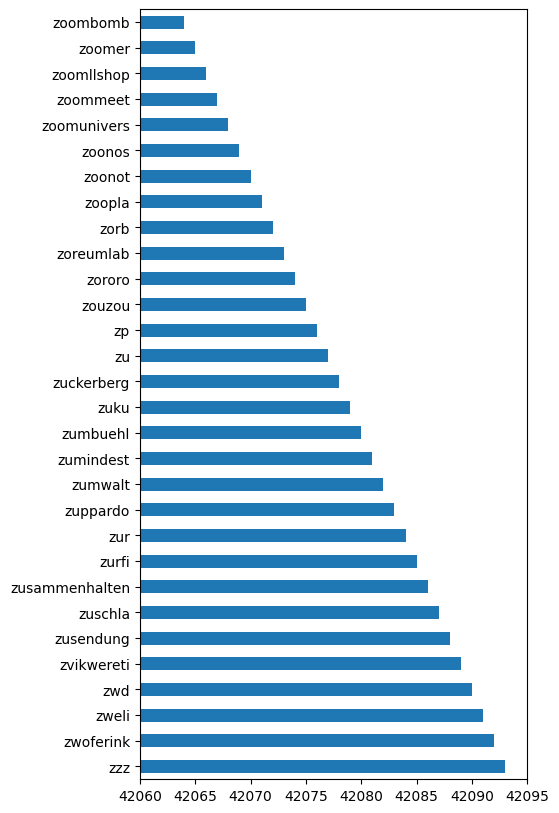

In [ ]:
vocabul.head(30).plot(kind = 'barh',figsize=(5,10),xlim= (42060, 42095))

##### Which text vectorization technique have you used and why?

I used CountVectorizer Technique for Bag-of-Word(BOW) because countvectorization works better in short/medium data set.

And TF-IDF Technique works better in Large data set.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Already Manipulated in EDA part

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Already Manipulated in EDA

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
data.drop(['UserName','ScreenName'],axis =1,inplace=True)

##### What all feature selection methods have you used  and why?

I removed 2('UserName','ScreenName') Columns because these are unnecessary.

##### Which all features you found important and why?

In [ ]:
data.head(2)

,Location,Tweet_Date,OriginalTweet,Sentiment,Tweet_Month,hastag,user_name,Tweet
0,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,3,[],"[@MeNyrbie, @Phil_Gahan, @Chrisitv]",
1,UK,2020-03-16,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,3,[],[],advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account poss adequ suppli regular med order


We found Location, Tweet_At,Sentiment and OriginalTweet.

Location tells Country name where tweet posted.

Tweet_At tells Date when tweet posted.

Sentiment tells tweet is Negative ,Positive or Neutral. This is our Target Variable.

OriginalTweet is the Tweet which contain text with #tags and username.


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
def senti_anal(val):
  if (val=='Positive') | (val=='Extremely Positive'):  
    return 'Positive'
  elif (val=='Negative') | (val=='Extremely Negative'):
    return 'Negative'
  else:
    return 'Neutral'  

In [ ]:
data['Sentiment']=data['Sentiment'].apply(senti_anal)

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In [ ]:
# DImensionality Reduction (If needed)

**Not Needed**

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

### 8. Data Splitting

In [ ]:
x=data['Tweet']
y=data['Sentiment']

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.2, random_state = 42, stratify = y)
print(x_train.shape)                                   
x_test.shape                                   

(32925,)


(8232,)

##### What data splitting ratio have you used and why? 

We used 80:20 splitting ratio because the most common split ratio. 

That is 80% of the dataset goes into the training set and 20% of the dataset goes into the testing set.

### 6. Data Scaling

In [ ]:
# Scaling your data
# Not Needed

##### Which method have you used to scale you data and why?

Answer Here.

### 9. Handling Imbalanced Dataset

<Axes: ylabel='Sentiment'>

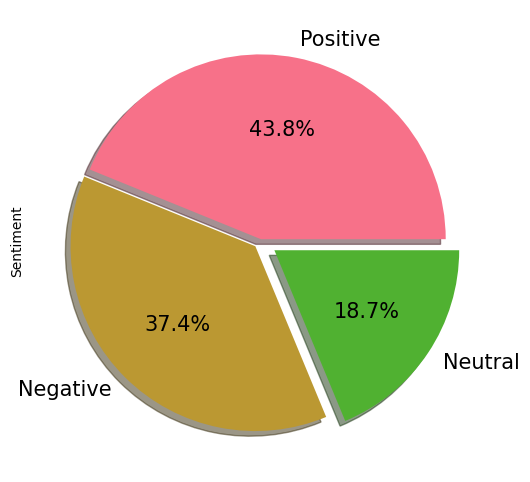

In [ ]:
# Handling Imbalanced Dataset (If needed)
plt.figure(figsize=(6,6))

data['Sentiment'].value_counts().plot(kind='pie',
                                         fontsize=15,
                                         autopct="%0.1f%%",
                                         labels=dataset['Sentiment'].value_counts().index,
                                         explode=[0.01,0.04,0.09],
                                         colors = sns.color_palette("husl"),
                                         shadow=True
                                         )

**I think there is no need of Data imbalance handling.**

**Because 60-40% or 70-30% is normal.**

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

In [ ]:
# Vectorizing Text
count_vectorizer = CountVectorizer()
x_train_vectorized=count_vectorizer.fit_transform(x_train)
x_test_vectorized =count_vectorizer.transform(x_test)




## ***7. ML Model Implementation***

### ML Model - 1 - Logistic Regression

In [ ]:
def mod_evaluat(model, true, predicted):
  
  """Function which gives output of the model implimentation on train 
     and test set (Used as Output Display) """

  train_accuracy = model.score(x_train_vectorized, y_train)
  test_accuracy = accuracy_score(true, predicted)
  report = classification_report(predicted, true)

  print(model,'\n')
  print('Train Accuracy: ',round((train_accuracy), 2)*100,'%')
  print('Test Accuracy: ',round((test_accuracy), 2)*100,'%')
  print('Model Report: \n', report)
  

In [ ]:
def conf_matrix(model, true, predicted):
  print('-'*40)
  print('Confusion Matrix: \n')
  cm = confusion_matrix(true, predicted)
  cm = cm / np.sum(cm, axis = 1)[:,None]
  labels = y.unique()
  sns.set(rc={'figure.figsize':[5,4]})
  sns.heatmap(cm, xticklabels = labels,
            yticklabels = labels, 
            annot=True, 
            cmap = 'YlGnBu')
  plt.show()
  plt.pause(0.05)


In [ ]:
#function compute test accuracy for comparison
from sklearn.metrics import f1_score
def mod_comp(model, true, predicted):
  test_accur= accuracy_score(true, predicted)
  f1_scor = f1_score(true, predicted,average='weighted')
  report = classification_report(predicted, true) 
  return test_accur,f1_scor
  

In [ ]:
# ML Model - 1 Implementation
LogReg = LogisticRegression()
# Fit the Algorithm
LogReg.fit(x_train_vectorized, y_train)

# Predict on the model
LogReg_prediction = LogReg.predict(x_test_vectorized)
# Report



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

LogisticRegression() 

Train Accuracy:  95.0 %
Test Accuracy:  79.0 %
Model Report: 
               precision    recall  f1-score   support

    Negative       0.80      0.81      0.80      3026
     Neutral       0.69      0.68      0.68      1560
    Positive       0.83      0.82      0.83      3646

    accuracy                           0.79      8232
   macro avg       0.77      0.77      0.77      8232
weighted avg       0.79      0.79      0.79      8232

----------------------------------------
Confusion Matrix: 



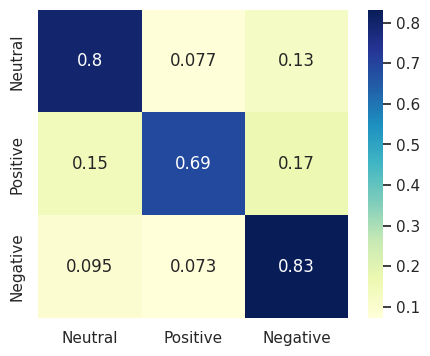

In [ ]:
# Visualizing evaluation Metric Score chart
mod_evaluat(LogReg, y_test, LogReg_prediction)
conf_matrix(LogReg, y_test, LogReg_prediction)

####Actual vs Predict Values

In [ ]:
act_vs_pred=pd.DataFrame({"actual":y_test,"prediction": LogReg_prediction})
act_vs_pred

,actual,prediction
40808,Neutral,Neutral
5985,Neutral,Neutral
20744,Neutral,Neutral
33710,Neutral,Positive
13298,Neutral,Negative
...,...,...
16366,Negative,Negative
9179,Neutral,Positive
5155,Positive,Positive
26989,Negative,Neutral


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Initalizing the model
from sklearn.model_selection import GridSearchCV
Logreg_cv = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01,0.01])

#Hyperparameter tuning by GridserchCV
logreg_Gcv=GridSearchCV(Logreg_cv,parameters,cv=5)

#fitting the data to model
%time logreg_Gcv.fit(x_train_vectorized, y_train)

# Predict on the model
lgcv_pred=logreg_Gcv.predict(x_test_vectorized)


CPU times: user 2min 6s, sys: 2min 24s, total: 4min 30s
Wall time: 2min 52s


LogisticRegression(C=0.1) 

Train Accuracy:  87.0 %
Test Accuracy:  80.0 %
Model Report: 
               precision    recall  f1-score   support

    Negative       0.80      0.81      0.81      3045
     Neutral       0.68      0.71      0.69      1480
    Positive       0.84      0.82      0.83      3707

    accuracy                           0.80      8232
   macro avg       0.77      0.78      0.78      8232
weighted avg       0.80      0.80      0.80      8232

----------------------------------------
Confusion Matrix: 



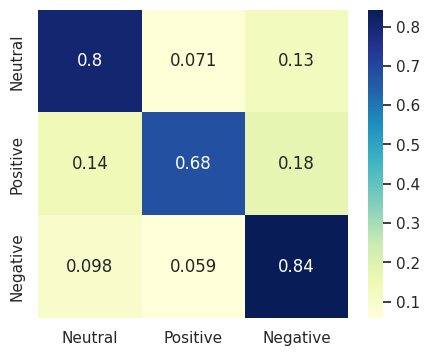

In [ ]:
mod_evaluat(logreg_Gcv.best_estimator_, y_test, lgcv_pred)
conf_matrix(logreg_Gcv.best_estimator_, y_test, lgcv_pred)

In [ ]:
print('The Best estimator or model : ',logreg_Gcv.best_estimator_)
print("\nThe best fit parameters value is found out to be :" ,logreg_Gcv.best_params_)
print( "\n the average of all the cross-validation fold : ", logreg_Gcv.best_score_)

The Best estimator or model :  LogisticRegression(C=0.1)

The best fit parameters value is found out to be : {'C': 0.1, 'penalty': 'l2'}

 the average of all the cross-validation fold :  0.7840242976461655


##### Which hyperparameter optimization technique have you used and why?

I used Grid Search CV optimization technique because GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Nothing more difference,i saw improve in accuracy 80% which was 79%.

Train accuracy decreased by 8%(95 - 87)

And improve in precision, recall and f1-score of both with and without Hyperparameter technique demonstrate in below cell.

In [ ]:
print(' Evaluation metric Score Chart (Base model)\n')
mod_evaluat(LogReg, y_test, LogReg_prediction)
print('-'*40,'\n Evaluation metric Score Chart with Hyperparameter technique\n')
mod_evaluat(logreg_Gcv.best_estimator_, y_test, lgcv_pred)

 Evaluation metric Score Chart (Base model)

LogisticRegression() 

Train Accuracy:  95.0 %
Test Accuracy:  79.0 %
Model Report: 
               precision    recall  f1-score   support

    Negative       0.80      0.81      0.80      3026
     Neutral       0.69      0.68      0.68      1560
    Positive       0.83      0.82      0.83      3646

    accuracy                           0.79      8232
   macro avg       0.77      0.77      0.77      8232
weighted avg       0.79      0.79      0.79      8232

---------------------------------------- 
 Evaluation metric Score Chart with Hyperparameter technique

LogisticRegression(C=0.1) 

Train Accuracy:  87.0 %
Test Accuracy:  80.0 %
Model Report: 
               precision    recall  f1-score   support

    Negative       0.80      0.81      0.81      3045
     Neutral       0.68      0.71      0.69      1480
    Positive       0.84      0.82      0.83      3707

    accuracy                           0.80      8232
   macro avg       0.

### ML Model - 2- Stochastic Gradient Descent (SGD)

In [ ]:
# ML Model - 2 Implementation
SGDClassifier_model = SGDClassifier(max_iter = 10000)
SGDClassifier_model.fit(x_train_vectorized, y_train)

# Predict on the model
SGDC_prediction = SGDClassifier_model.predict(x_test_vectorized)

# Report

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

SGDClassifier(max_iter=10000) 

Train Accuracy:  93.0 %
Test Accuracy:  81.0 %
Model Report: 
               precision    recall  f1-score   support

    Negative       0.82      0.83      0.82      3047
     Neutral       0.71      0.72      0.72      1509
    Positive       0.86      0.84      0.85      3676

    accuracy                           0.81      8232
   macro avg       0.79      0.80      0.80      8232
weighted avg       0.81      0.81      0.81      8232

----------------------------------------
Confusion Matrix: 



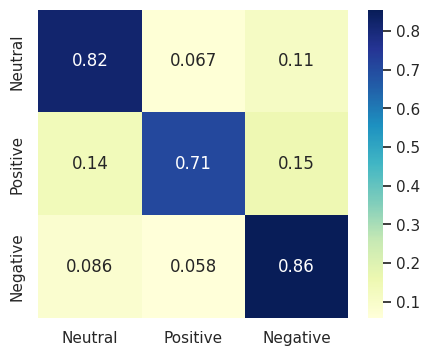

In [ ]:
# Visualizing evaluation Metric Score chart
mod_evaluat(SGDClassifier_model, y_test, SGDC_prediction)
conf_matrix(SGDClassifier_model, y_test, SGDC_prediction)

####Actual vs Predict Values

In [ ]:
act_vs_pred=pd.DataFrame({"actual":y_test,"prediction":SGDC_prediction })
act_vs_pred.head(20)

,actual,prediction
40808,Neutral,Neutral
5985,Neutral,Neutral
20744,Neutral,Neutral
33710,Neutral,Positive
13298,Neutral,Neutral
39033,Neutral,Negative
39666,Positive,Positive
8274,Negative,Negative
20580,Negative,Neutral
8350,Positive,Positive


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import RandomizedSearchCV 
sgdc_cv = SGDClassifier()
parameters = dict(penalty=['l1', 'l2'],alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] )

#Hyperparameter tuning by GridserchCV
sgdc_Rcv=RandomizedSearchCV(estimator=sgdc_cv,param_distributions=parameters,  
                              verbose=1, n_jobs=-1, n_iter=1000) 

#fitting the data to model
%time sgdc_Rcv.fit(x_train_vectorized, y_train)

# Predict on the model
sgdcr_pred=sgdc_Rcv.predict(x_test_vectorized)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
CPU times: user 2.35 s, sys: 392 ms, total: 2.75 s
Wall time: 26.3 s


SGDClassifier(penalty='l1') 

Train Accuracy:  86.0 %
Test Accuracy:  83.0 %
Model Report: 
               precision    recall  f1-score   support

    Negative       0.82      0.84      0.83      3002
     Neutral       0.76      0.73      0.74      1596
    Positive       0.86      0.85      0.86      3634

    accuracy                           0.83      8232
   macro avg       0.81      0.81      0.81      8232
weighted avg       0.83      0.83      0.83      8232

----------------------------------------
Confusion Matrix: 



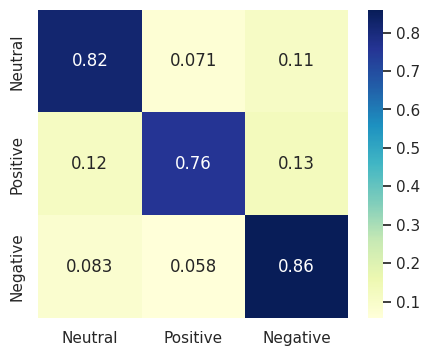

In [ ]:
mod_evaluat(sgdc_Rcv.best_estimator_, y_test, sgdcr_pred)
conf_matrix(sgdc_Rcv.best_estimator_, y_test, sgdcr_pred)

In [ ]:
print('The Best estimator : ',sgdc_Rcv.best_estimator_)
print("\nThe best fit alpha value is found out to be :" ,sgdc_Rcv.best_params_)
print( "\n the average of all the cross-validation fold : ", sgdc_Rcv.best_score_)

The Best estimator :  SGDClassifier(penalty='l1')

The best fit alpha value is found out to be : {'penalty': 'l1', 'alpha': 0.0001}

 the average of all the cross-validation fold :  0.8118147304479878


##### Which hyperparameter optimization technique have you used and why?

I used Random Search CV because RandomizedSearchCV randomly passes the set of hyperparameters and calculate the score and gives the best set of hyperparameters which gives the best score as an output.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Nothing more,i saw improve in accuracy 83% which was 81%.


And improve in precision, recall and f1-score of both with and without Hyperparameter technique demonstrate in below cell.

In [ ]:
print(' Evaluation metric Score Chart (Base model)\n')
mod_evaluat(SGDClassifier_model, y_test, SGDC_prediction)
print('-'*40,'\n Evaluation metric Score Chart with Hyperparameter technique\n')
mod_evaluat(sgdc_Rcv.best_estimator_, y_test, sgdcr_pred)

 Evaluation metric Score Chart (Base model)

SGDClassifier(max_iter=10000) 

Train Accuracy:  93.0 %
Test Accuracy:  81.0 %
Model Report: 
               precision    recall  f1-score   support

    Negative       0.82      0.83      0.82      3047
     Neutral       0.71      0.72      0.72      1509
    Positive       0.86      0.84      0.85      3676

    accuracy                           0.81      8232
   macro avg       0.79      0.80      0.80      8232
weighted avg       0.81      0.81      0.81      8232

---------------------------------------- 
 Evaluation metric Score Chart with Hyperparameter technique

SGDClassifier(penalty='l1') 

Train Accuracy:  86.0 %
Test Accuracy:  83.0 %
Model Report: 
               precision    recall  f1-score   support

    Negative       0.82      0.84      0.83      3002
     Neutral       0.76      0.73      0.74      1596
    Positive       0.86      0.85      0.86      3634

    accuracy                           0.83      8232
   macro a

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 - Naive Bayes Classifier

In [ ]:
# ML Model - 3 Implementation
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
#Fit the Algorithm
gnb.fit(x_train_vectorized, y_train)

# Predict on the model
gnb_pred = gnb.predict(x_test_vectorized)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MultinomialNB() 

Train Accuracy:  79.0 %
Test Accuracy:  67.0 %
Model Report: 
               precision    recall  f1-score   support

    Negative       0.74      0.68      0.71      3366
     Neutral       0.22      0.70      0.34       487
    Positive       0.81      0.67      0.73      4379

    accuracy                           0.67      8232
   macro avg       0.59      0.68      0.59      8232
weighted avg       0.75      0.67      0.70      8232

----------------------------------------
Confusion Matrix: 



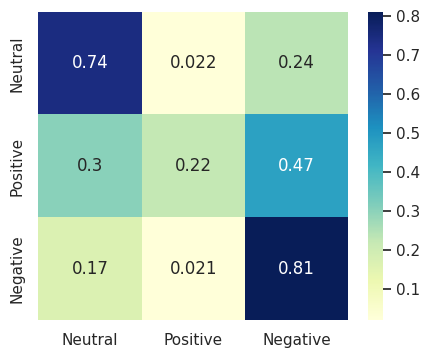

In [ ]:
# Visualizing evaluation Metric Score chart
mod_evaluat(gnb, y_test, gnb_pred)
conf_matrix(gnb, y_test, gnb_pred)

####Actual vs Predict Values

In [ ]:
act_vs_pred=pd.DataFrame({"actual":y_test,"prediction":gnb_pred })
act_vs_pred.head(20)


,actual,prediction
40808,Neutral,Negative
5985,Neutral,Positive
20744,Neutral,Positive
33710,Neutral,Positive
13298,Neutral,Positive
39033,Neutral,Negative
39666,Positive,Negative
8274,Negative,Negative
20580,Negative,Positive
8350,Positive,Negative


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False]
         }
# Fit the Algorithm

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(x_train_vectorized, y_train)

# Predict on the model
nb_pred_cv=multinomial_nb_grid.predict(x_test_vectorized)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


MultinomialNB(fit_prior=False) 

Train Accuracy:  80.0 %
Test Accuracy:  69.0 %
Model Report: 
               precision    recall  f1-score   support

    Negative       0.75      0.68      0.71      3401
     Neutral       0.34      0.70      0.46       760
    Positive       0.79      0.70      0.74      4071

    accuracy                           0.69      8232
   macro avg       0.63      0.69      0.64      8232
weighted avg       0.73      0.69      0.70      8232

----------------------------------------
Confusion Matrix: 



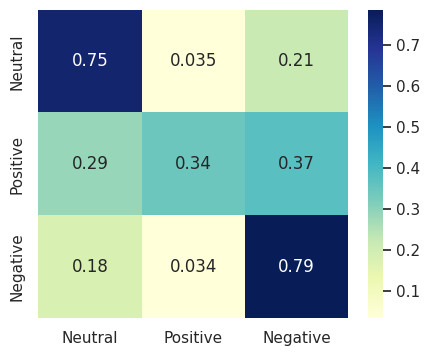

In [ ]:
mod_evaluat(multinomial_nb_grid.best_estimator_, y_test, nb_pred_cv)
conf_matrix(multinomial_nb_grid.best_estimator_, y_test, nb_pred_cv)

In [ ]:
print('The Best estimator : ',multinomial_nb_grid.best_estimator_)
print("\nThe best fit alpha value is found out to be :" ,multinomial_nb_grid.best_params_)
print( "\nthe average of all the cross-validation fold : ", multinomial_nb_grid.best_score_)

The Best estimator :  MultinomialNB(fit_prior=False)

The best fit alpha value is found out to be : {'alpha': 1.0, 'fit_prior': False}

the average of all the cross-validation fold :  0.6780865603644646


##### Which hyperparameter optimization technique have you used and why?

I used Grid Search CV optimization technique because GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is not much impact, improve in accuracy 69% which was 67%.


And precision, recall and f1-score of both with and without Hyperparameter technique demonstrate in below cell.

In [ ]:
print(' Evaluation metric Score Chart (Base model)\n')
mod_evaluat(gnb, y_test, gnb_pred)
print('-'*40,'\n Evaluation metric Score Chart with Hyperparameter technique\n')
mod_evaluat(multinomial_nb_grid.best_estimator_, y_test, nb_pred_cv)

 Evaluation metric Score Chart (Base model)

MultinomialNB() 

Train Accuracy:  79.0 %
Test Accuracy:  67.0 %
Model Report: 
               precision    recall  f1-score   support

    Negative       0.74      0.68      0.71      3366
     Neutral       0.22      0.70      0.34       487
    Positive       0.81      0.67      0.73      4379

    accuracy                           0.67      8232
   macro avg       0.59      0.68      0.59      8232
weighted avg       0.75      0.67      0.70      8232

---------------------------------------- 
 Evaluation metric Score Chart with Hyperparameter technique

MultinomialNB(fit_prior=False) 

Train Accuracy:  80.0 %
Test Accuracy:  69.0 %
Model Report: 
               precision    recall  f1-score   support

    Negative       0.75      0.68      0.71      3401
     Neutral       0.34      0.70      0.46       760
    Positive       0.79      0.70      0.74      4071

    accuracy                           0.69      8232
   macro avg       0.

### Models Comparison

In [ ]:
# accuracy, and f1_score of Models 
logreg_acc , logreg_f1 = mod_comp(LogReg, y_test, LogReg_prediction)

logregCV_acc , logregCV_f1 = mod_comp(logreg_Gcv.best_estimator_, y_test, lgcv_pred)

sgdc_acc , sgdc_f1 = mod_comp(SGDClassifier_model, y_test, SGDC_prediction)\

sgdcCV_acc , sgdcCV_f1 = mod_comp(sgdc_Rcv.best_estimator_, y_test, sgdcr_pred)

naiveb_acc , naiveb_f1 = mod_comp(gnb, y_test, gnb_pred)

naivebCV_acc , naivebCV_f1 = mod_comp(multinomial_nb_grid.best_estimator_, y_test, nb_pred_cv)

In [ ]:
models_df = pd.DataFrame(
    {'Models': ['Logistic Regression','SGDClassifier','Naive Bayes Classifier','Logistic Regression on CV','SGDClassifier on CV','Naive_BC on CV'],
     'Test Accuracy': [logreg_acc, sgdc_acc, naiveb_acc,logregCV_acc,sgdcCV_acc,naivebCV_acc],
     'F1 Score' : [logreg_f1, sgdc_f1, naiveb_f1,logregCV_f1,sgdcCV_f1,naivebCV_f1]
    })
models_df.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)
models_df.reset_index(drop=True)

,Models,Test Accuracy,F1 Score
0,SGDClassifier on CV,0.825559,0.825794
1,SGDClassifier,0.814140,0.813822
2,Logistic Regression on CV,0.796890,0.796312
3,Logistic Regression,0.791788,0.791863
4,Naive_BC on CV,0.689626,0.676839
5,Naive Bayes Classifier,0.674563,0.649684


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Accuracy** is best evaluation metric to business impact because 'Accuracy' get answer the question, what percent of the models predictions were correct.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I seem **SGDClassifier** is best model from above created because it have highest Accuracy And F1_score.

And even in Cross-Validation & Hyperparameter Tuning technique **SGDClassifier** have higghest accuracy.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. Speaking of locations, Most of the tweets has been made anonumly or without a location share, which contribute around 21% of the total tweets made globelly. On the second place, It is London and London, England both contributed around 2.5% of total tweets made globelly.

2. #coronavirus and other versions of it were the most trending hashtags during the timeline.

3. @realDonaldTrump and @Tesco were the most tagged and active users on the twitter.

4. Its not a surprice that covid is the most common word used in the tweets. It made more than 12000 apperence in tweets globelly. After that mostly, Food and Survice related words were mostly used.

5. Initially, 5 taget sentiments were given for the classification later then converted into 3-Class targets i.e. POSITIVE, NEGATIVE and NEUTRAL which made Sentiment Classification a little easier.

6. For vectorization, Count_vectorizer has been used, which Convert a collection of raw documents to vector of term/token counts.

7. For a Multiclass Classification, SGDClassifier scored 81% accuracy. After which, Increase to 1% when hyper-tuned with RandomSearchCV.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***